# Introduction to Linear Regression

Linear regression may be defined as the statistical model that analyzes the linear relationship between a dependent variable with given set of independent variables. 

Linear relationship between variables means that when the value of one or more independent variables will change (increase or decrease), the value of dependent variable will also change accordingly (increase or decrease).

Mathematically the relationship can be represented with the help of following equation −

Y=mX+b

Here, Y is the dependent variable we are trying to predict.

X is the independent variable we are using to make predictions.

m is the slop of the regression line which represents the effect X has on Y

b is a constant, known as the 𝑌Y-intercept. If X = 0,Y would be equal to 𝑏b.

Furthermore, the linear relationship can be positive or negative in nature as explained below −

# Positive Linear Relationship

A linear relationship will be called positive if both independent and dependent variable increases. It can be understood with the help of following graph −

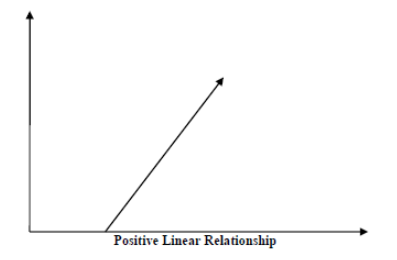

# Negative Linear relationship

A linear relationship will be called positive if independent increases and dependent variable decreases. It can be understood with the help of following graph −

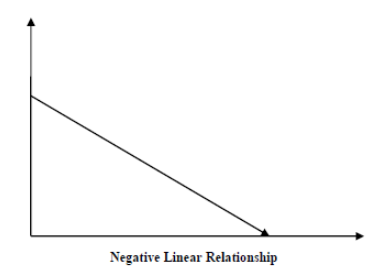

# Types of Linear Regression

Linear regression is of the following two types −

Simple Linear Regression

Multiple Linear Regression

# Simple Linear Regression

In the following Python implementation example, we are using diabetes dataset from scikit-learn.

First, we will start with importing necessary packages as follows −

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
X = diabetes.data[:, np.newaxis, 2]

In [4]:
X_train = X[:-30]
X_test = X[-30:]

In [5]:
y_train = diabetes.target[:-30]
y_test = diabetes.target[-30:]

In [6]:
regr = linear_model.LinearRegression()

In [7]:
regr.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = regr.predict(X_test)

In [9]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [941.43097333]
Mean squared error: 3035.06
Variance score: 0.41


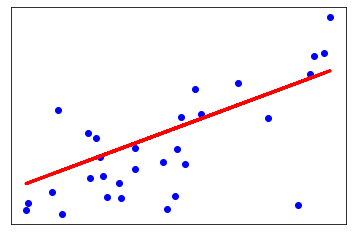

In [10]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color = 'red', linewidth = 3)
plt.xticks(())
plt.yticks(())
plt.show()

# Multiple Linear Regression

It is the extension of simple linear regression that predicts a response using two or more features. Mathematically we can explain it as follows −

Consider a dataset having n observations, p features i.e. independent variables and y as one response i.e. dependent variable the regression line for p features can be calculated as follows −

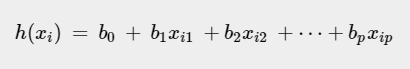

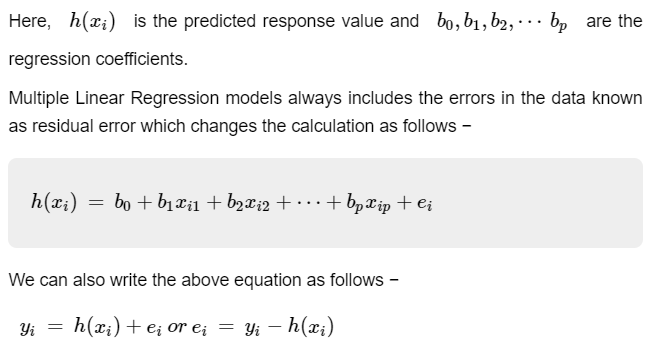

# Assumptions
The following are some assumptions about dataset that is made by Linear Regression model −

Multi-collinearity − Linear regression model assumes that there is very little or no multi-collinearity in the data. Basically, multi-collinearity occurs when the independent variables or features have dependency in them.

Auto-correlation − Another assumption Linear regression model assumes is that there is very little or no auto-correlation in the data. Basically, auto-correlation occurs when there is dependency between residual errors.

Relationship between variables − Linear regression model assumes that the relationship between response and feature variables must be linear.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Admission_Predict.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
data.shape


(400, 9)

In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
data.duplicated().sum()


0

In [8]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [10]:
data.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
data.nunique()


Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [12]:
data['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [13]:
data['University Rating'].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

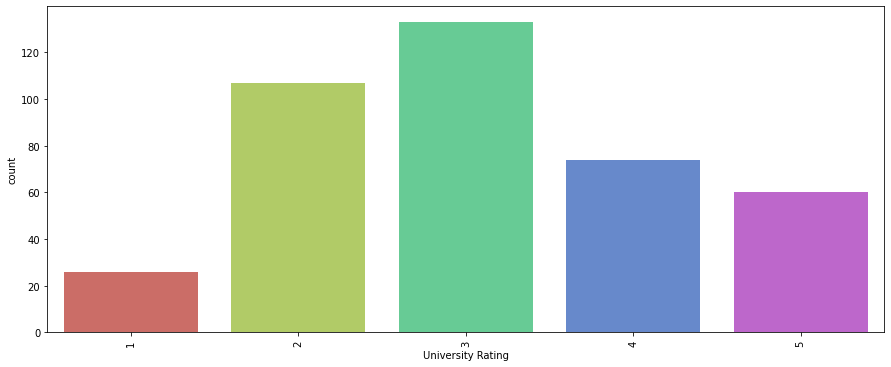

In [14]:
plt.figure(figsize=(15,6))
sns.countplot('University Rating', data = data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [15]:
data['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [16]:
data['SOP'].value_counts()


4.0    70
3.5    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64

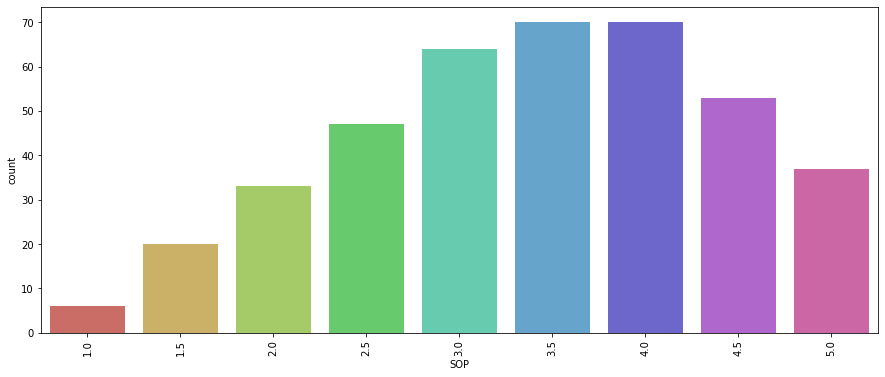

In [17]:
plt.figure(figsize=(15,6))
sns.countplot('SOP', data = data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [18]:
data['LOR '].unique()


array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [19]:
data['LOR '].value_counts()


3.0    85
4.0    77
3.5    73
4.5    45
2.5    39
2.0    38
5.0    35
1.5     7
1.0     1
Name: LOR , dtype: int64

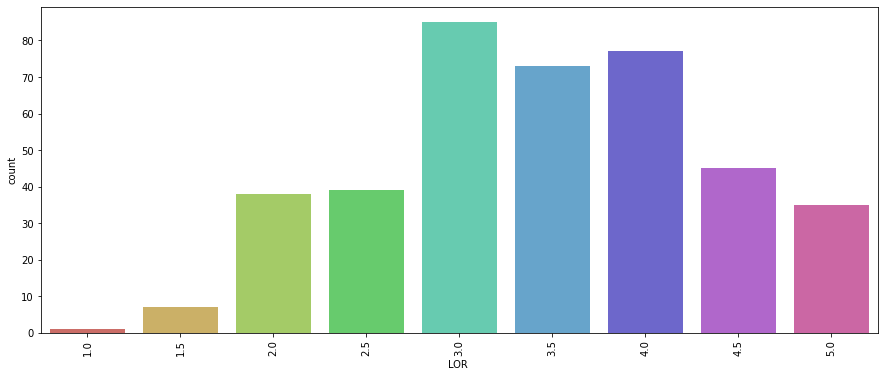

In [20]:
plt.figure(figsize=(15,6))
sns.countplot('LOR ', data = data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [21]:
data['Research'].unique()

array([1, 0], dtype=int64)

In [22]:
data['Research'].value_counts()


1    219
0    181
Name: Research, dtype: int64

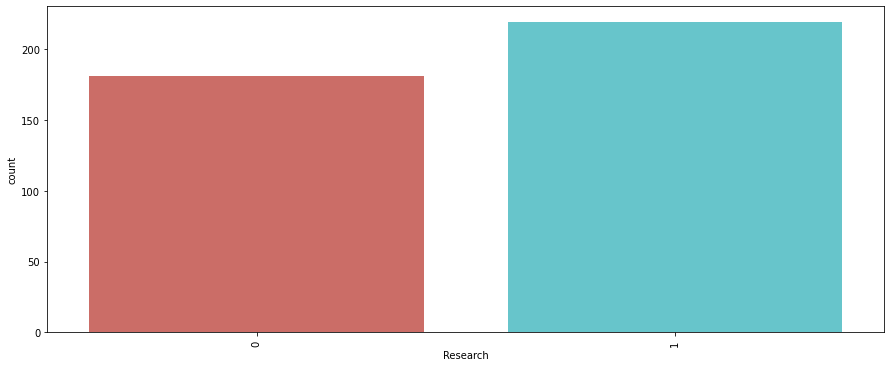

In [23]:
plt.figure(figsize=(15,6))
sns.countplot('Research', data = data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

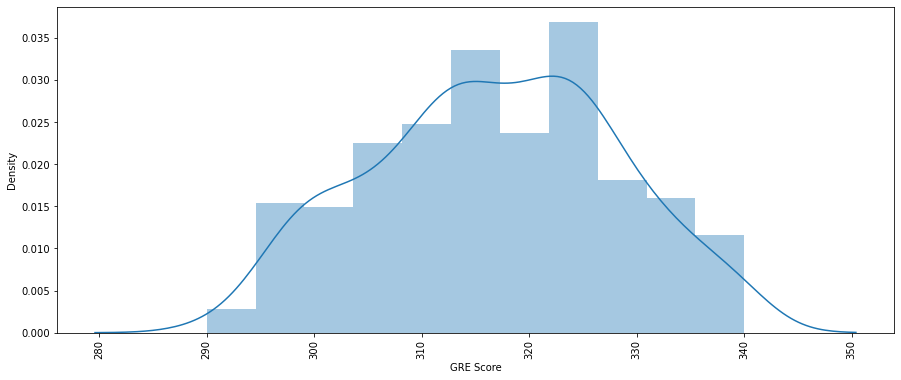

In [24]:
plt.figure(figsize=(15,6))
sns.distplot(data['GRE Score'])
plt.xticks(rotation = 90)
plt.show()

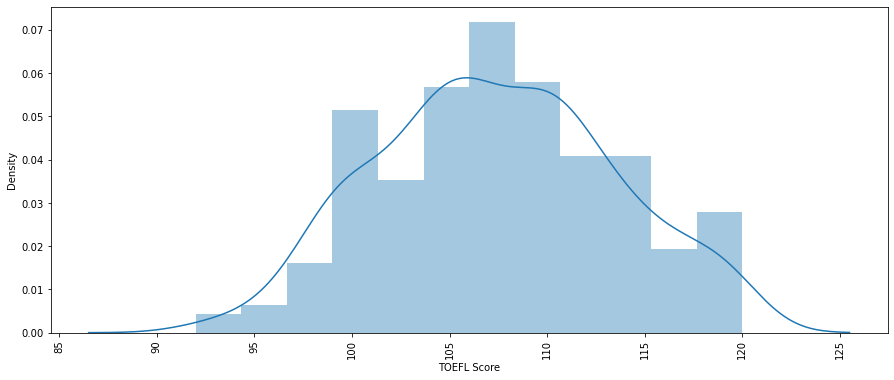

In [25]:
plt.figure(figsize=(15,6))
sns.distplot(data['TOEFL Score'])
plt.xticks(rotation = 90)
plt.show()

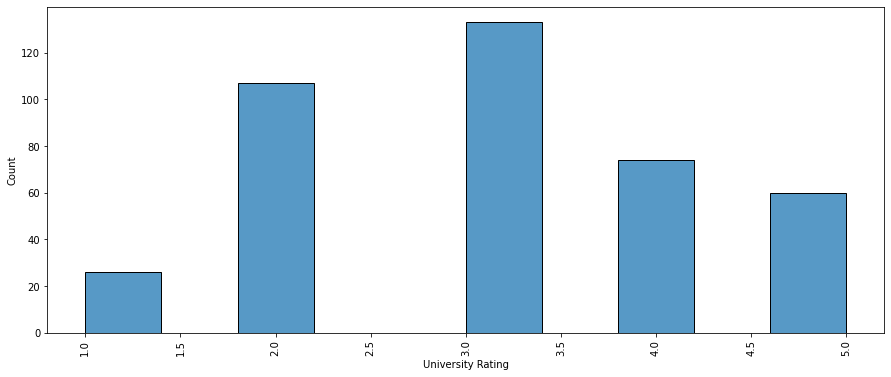

In [26]:
plt.figure(figsize=(15,6))
sns.histplot(data['University Rating'])
plt.xticks(rotation = 90)
plt.show()

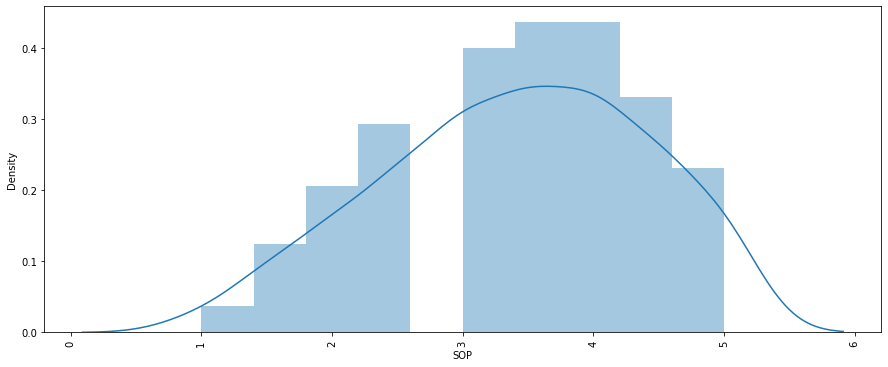

In [27]:
plt.figure(figsize=(15,6))
sns.distplot(data['SOP'])
plt.xticks(rotation = 90)
plt.show()

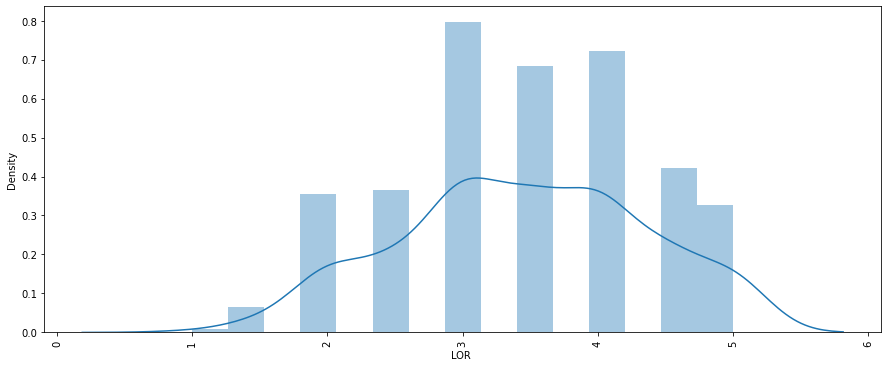

In [28]:
plt.figure(figsize=(15,6))
sns.distplot(data['LOR '])
plt.xticks(rotation = 90)
plt.show()

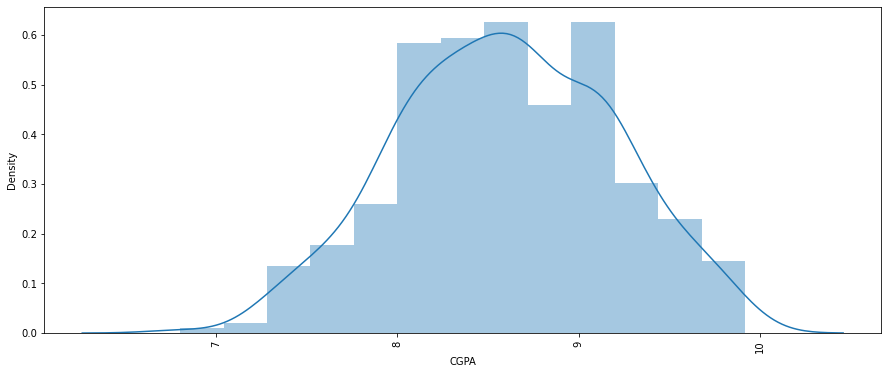

In [29]:
plt.figure(figsize=(15,6))
sns.distplot(data['CGPA'])
plt.xticks(rotation = 90)
plt.show()

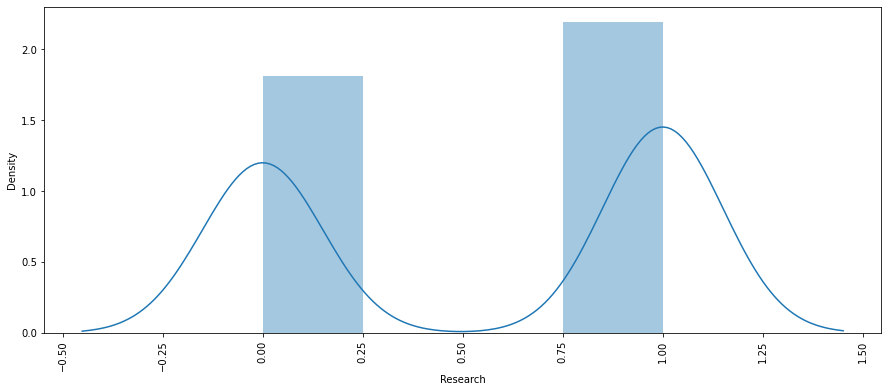

In [30]:
plt.figure(figsize=(15,6))
sns.distplot(data['Research'])
plt.xticks(rotation = 90)
plt.show()

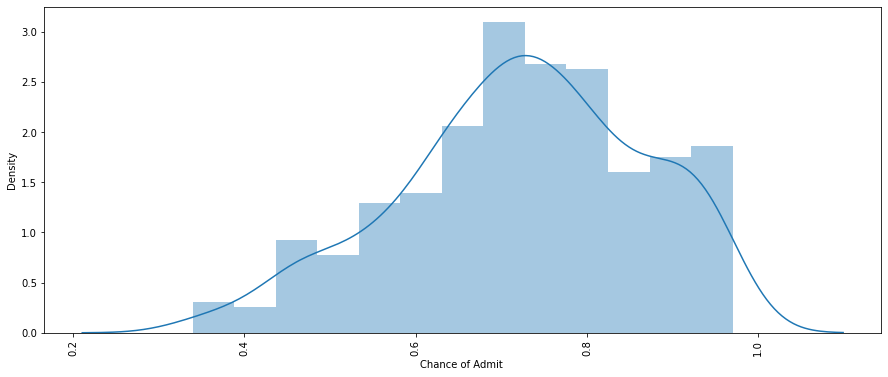

In [31]:
plt.figure(figsize=(15,6))
sns.distplot(data['Chance of Admit '])
plt.xticks(rotation = 90)
plt.show()

In [32]:
corrmat = data.corr()
corrmat

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

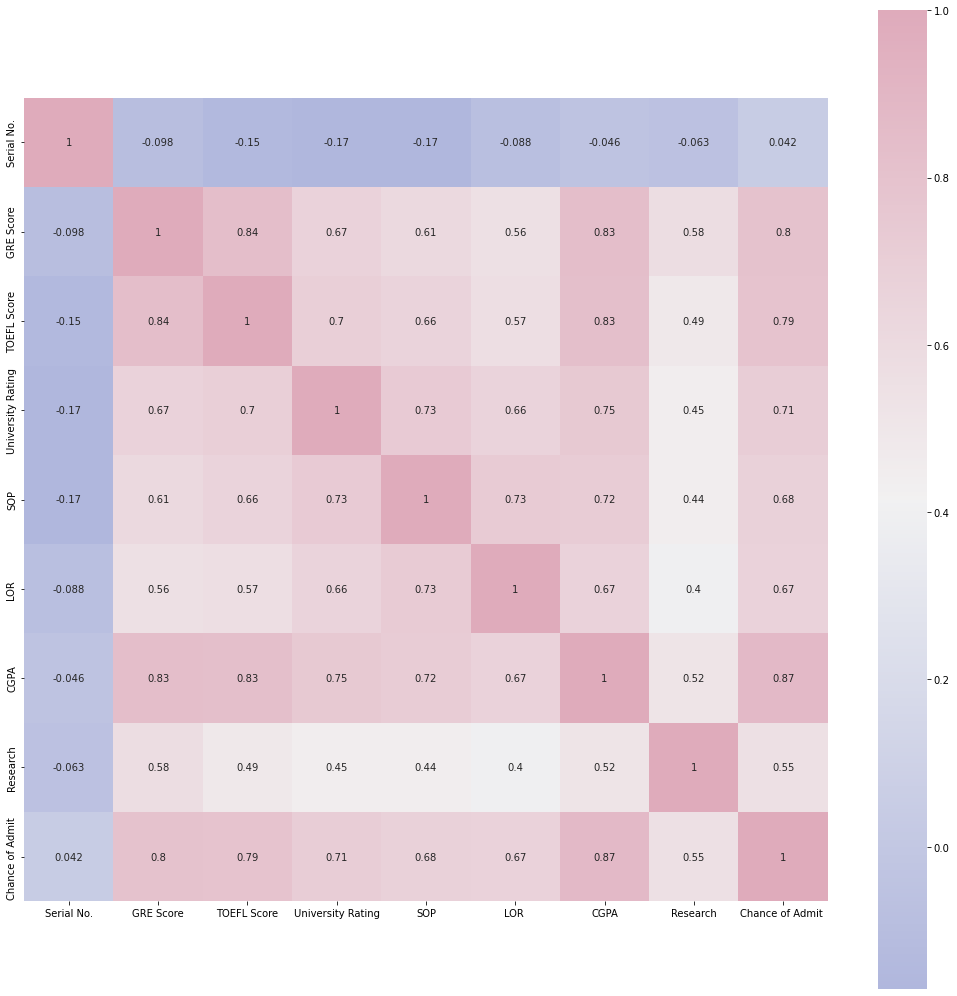

In [33]:
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

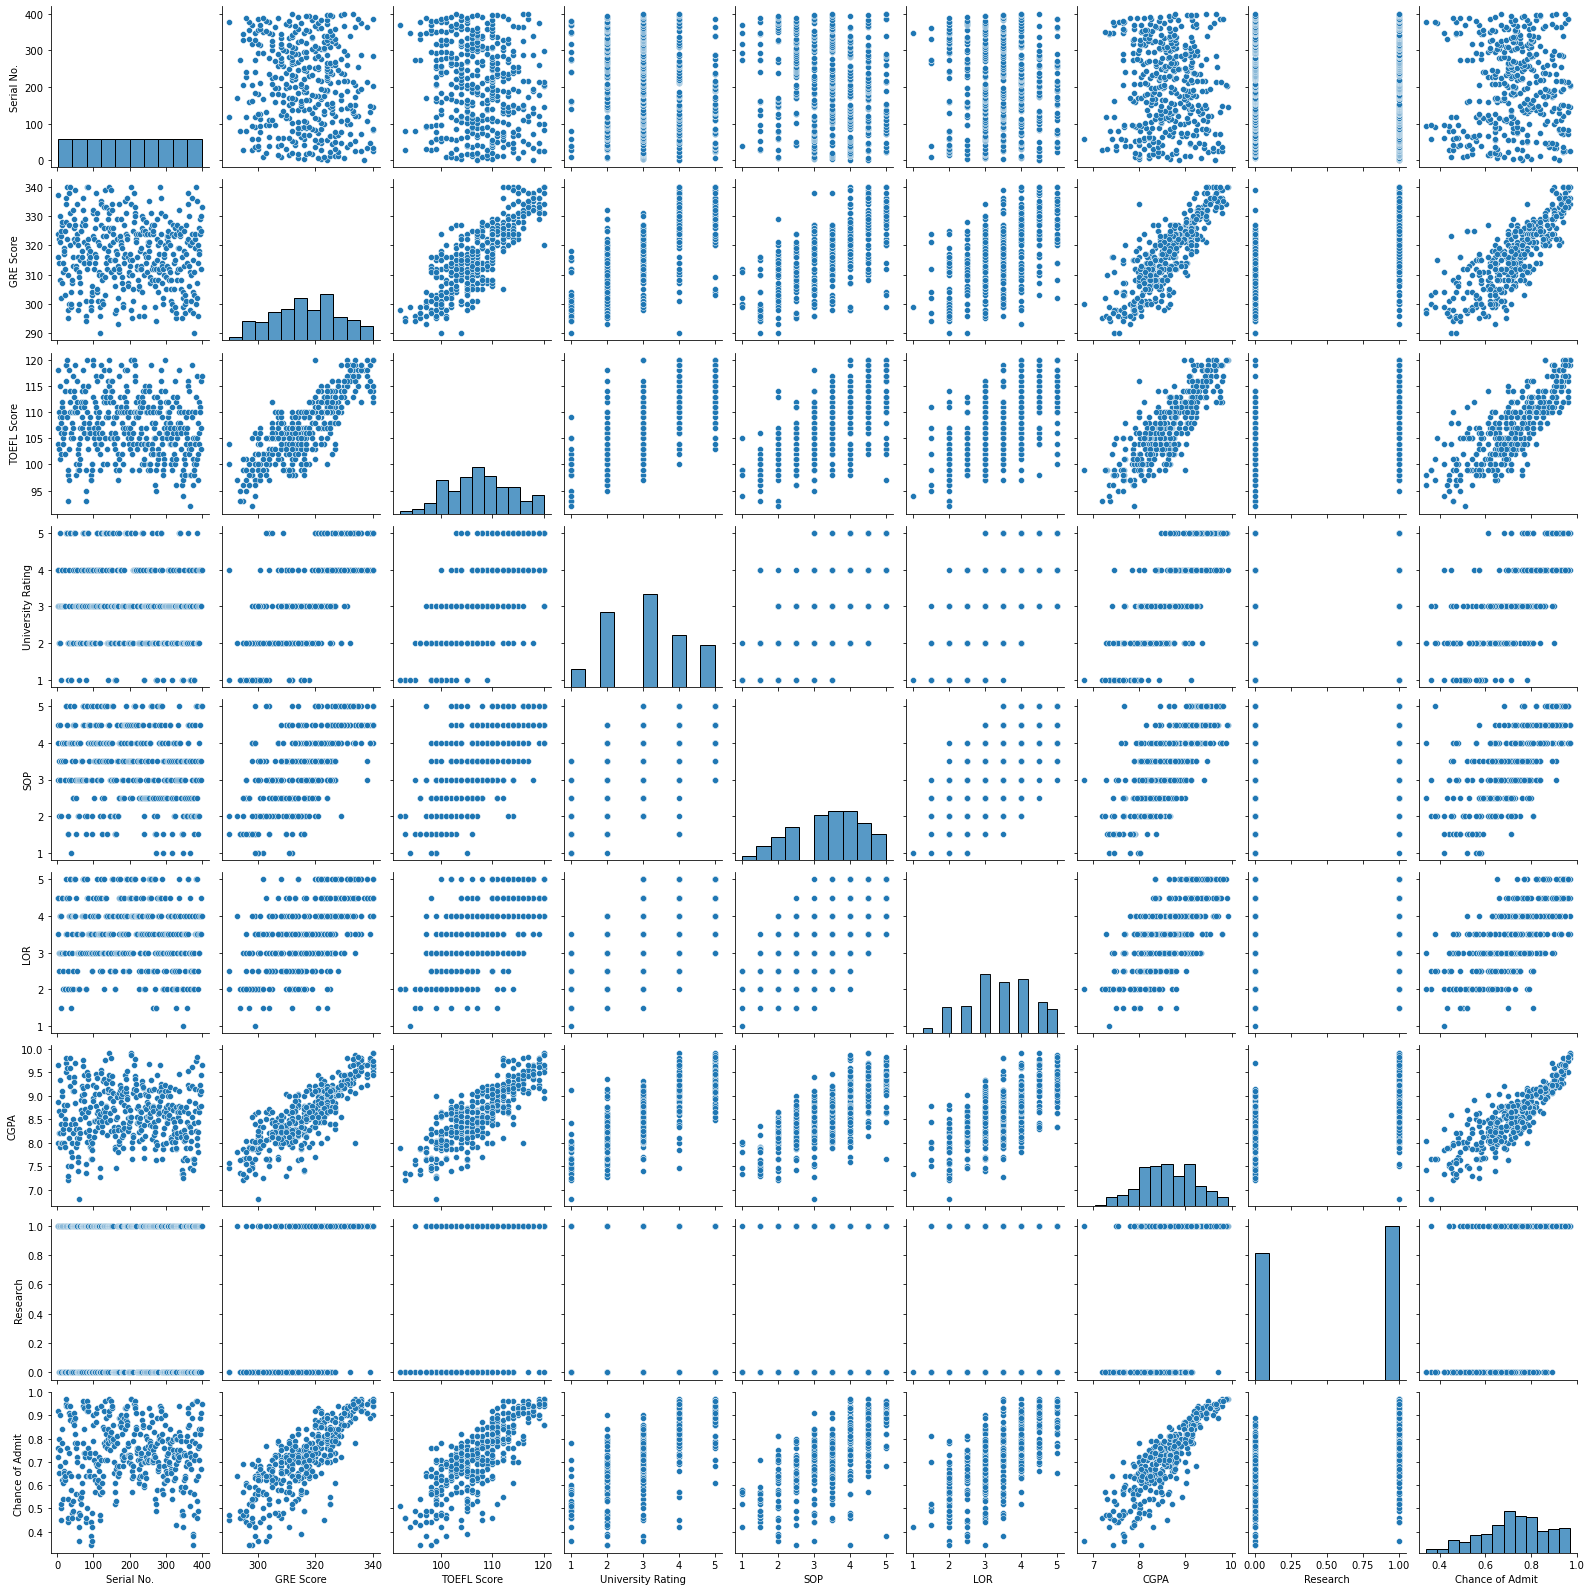

In [34]:
sns.pairplot(data)

In [35]:
X=data.drop('Chance of Admit ',axis=1)
Y=data['Chance of Admit ']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_predict=lr.predict(X_test)
train_accuracy_lr=lr.score(X_train,y_train)
test_accuracy_lr=lr.score(X_test,y_test)
print("Training Accuracy is", train_accuracy_lr)
print("Test Accuracy is", train_accuracy_lr)

Training Accuracy is 0.8157123222604523
Test Accuracy is 0.8157123222604523
